## Building an example conv net
### Adapted from Google Colab for Learning Purposes
https://colab.research.google.com/github/google/eng-edu/blob/main/ml/pc/exercises/image_classification_part1.ipynb

### Notes to self
```bash
conda activate ml
jupyter notebook
```

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-06-25 12:28:41--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.201.112, 216.58.212.208, 142.250.187.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.201.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  16.3MB/s    in 4.4s    

2023-06-25 12:28:46 (14.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Contents of directory look like this:
```bash
cats_and_dogs_filtered % ls -ltra
total 8
drwxrwxrwt  12 root wheel  384 25 Jun 12:29 ..
-rw-r--r--   1 foo  wheel  140 25 Jun 12:29 vectorize.py
drwxr-xr-x   5 foo  wheel  160 25 Jun 12:29 .
drwxr-xr-x   4 foo  wheel  128 25 Jun 12:29 validation
drwxr-xr-x   4 foo  wheel  128 25 Jun 12:29 train
```

In [5]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [10]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

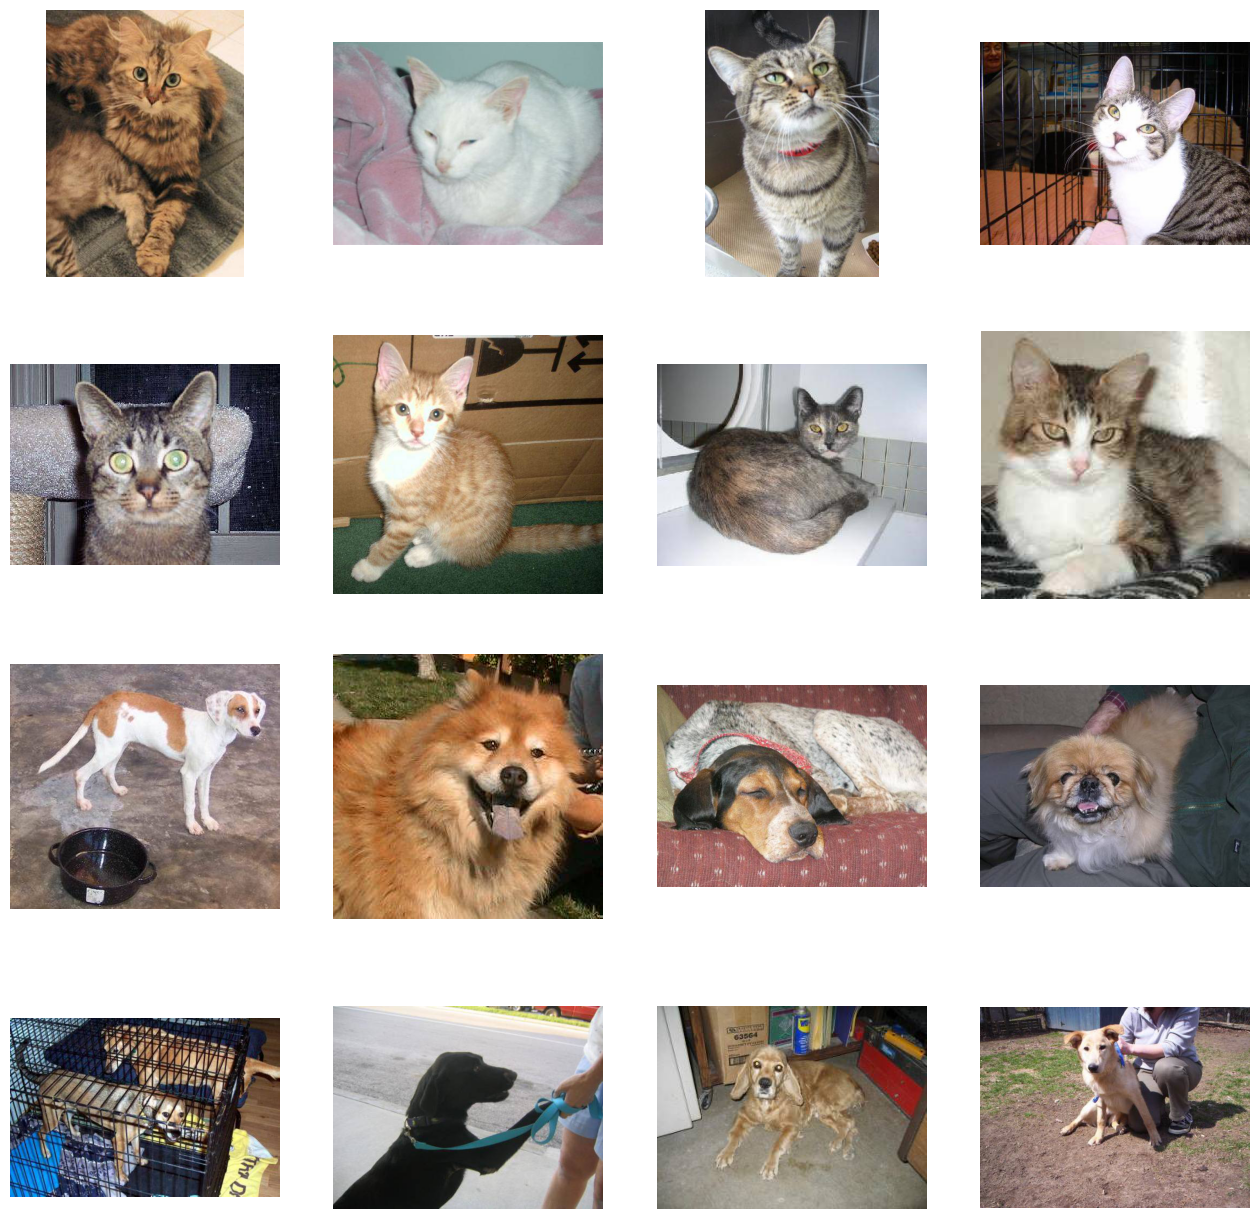

In [12]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [26]:
from tensorflow.keras import layers, Model

In [27]:
input_layer = layers.Input(shape=(150, 150, 3))
print(input_layer)
x = layers.Conv2D(16, 3, activation='relu')(input_layer)
print(x)
x = layers.MaxPool2D(2)(x)
print(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
print(x)
x = layers.MaxPooling2D(2)(x)
print(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
print(x)
x = layers.MaxPooling2D(2)(x)
print(x)


KerasTensor(type_spec=TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_9'), name='input_9', description="created by layer 'input_9'")
KerasTensor(type_spec=TensorSpec(shape=(None, 148, 148, 16), dtype=tf.float32, name=None), name='conv2d_10/Relu:0', description="created by layer 'conv2d_10'")
KerasTensor(type_spec=TensorSpec(shape=(None, 74, 74, 16), dtype=tf.float32, name=None), name='max_pooling2d_8/MaxPool:0', description="created by layer 'max_pooling2d_8'")
KerasTensor(type_spec=TensorSpec(shape=(None, 72, 72, 32), dtype=tf.float32, name=None), name='conv2d_11/Relu:0', description="created by layer 'conv2d_11'")
KerasTensor(type_spec=TensorSpec(shape=(None, 36, 36, 32), dtype=tf.float32, name=None), name='max_pooling2d_9/MaxPool:0', description="created by layer 'max_pooling2d_9'")
KerasTensor(type_spec=TensorSpec(shape=(None, 34, 34, 64), dtype=tf.float32, name=None), name='conv2d_12/Relu:0', description="created by layer 'conv2d_12'")
KerasTensor(type_spec=Ten

In [28]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)
print(x)
## Note -> fully connected layer working on 1d then
x = layers.Dense(512, activation='relu')(x)
print(x)
output = layers.Dense(1, activation='sigmoid')(x)
print(output)


KerasTensor(type_spec=TensorSpec(shape=(None, 18496), dtype=tf.float32, name=None), name='flatten_4/Reshape:0', description="created by layer 'flatten_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 512), dtype=tf.float32, name=None), name='dense_4/Relu:0', description="created by layer 'dense_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_5/Sigmoid:0', description="created by layer 'dense_5'")


In [29]:
model = Model(input_layer, output)

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 64)        18496 

In [38]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers.legacy import Adam

# use binary_crossentropy bc it's a classification problem with sigmoid activation
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
# M1 chip with tf 2.11 doesn't work with RMS prop
# don't care to downgrade ()
# Details: https://developer.apple.com/forums/thread/721619
# optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])
# configure start learning rate ^ for RMSprop, which adjusts learning rate itself  
# SGD doesn't do this
# other famous ones (adam, adagrad) also auto tune learning rate as it learns

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
100/100 - 7s - loss: 0.7476 - acc: 0.5045 - val_loss: 0.6913 - val_acc: 0.5060 - 7s/epoch - 65ms/step
Epoch 2/15
100/100 - 6s - loss: 0.6797 - acc: 0.5600 - val_loss: 0.6730 - val_acc: 0.6030 - 6s/epoch - 55ms/step
Epoch 3/15
100/100 - 5s - loss: 0.6339 - acc: 0.6535 - val_loss: 0.6497 - val_acc: 0.6040 - 5s/epoch - 53ms/step
Epoch 4/15
100/100 - 5s - loss: 0.5615 - acc: 0.7245 - val_loss: 0.6085 - val_acc: 0.6780 - 5s/epoch - 51ms/step
Epoch 5/15
100/100 - 5s - loss: 0.4773 - acc: 0.7675 - val_loss: 0.6178 - val_acc: 0.6910 - 5s/epoch - 51ms/step
Epoch 6/15
100/100 - 5s - loss: 0.4031 - acc: 0.8065 - val_loss: 0.6401 - val_acc: 0.7090 - 5s/epoch - 52ms/step
Epoch 7/15
100/100 - 5s - loss: 0.2921 - acc: 0.8740 - val_loss: 0.8253 - val_acc: 0.7050 - 5s/epoch - 49ms/step
Epoch 8/15
100/100 - 5s - loss: 0.2013 - acc: 0.9220 - val_loss: 0.9165 - val_acc: 0.6790 - 5s/epoch - 55ms/step
Epoch 9/15
100/100 - 5s - loss: 0.1234 - acc: 0.9515 - val_loss: 1.0043 - val_acc: 0.6940 - 5s/e

1/1 [==============================] - 0s 103ms/step


<ipython-input-41-43f4663dc7d7>:43: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


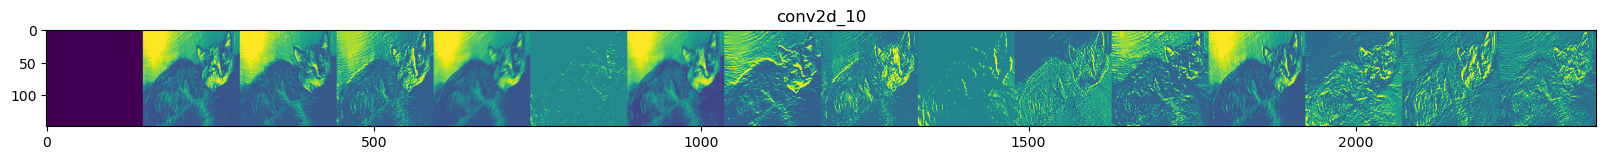

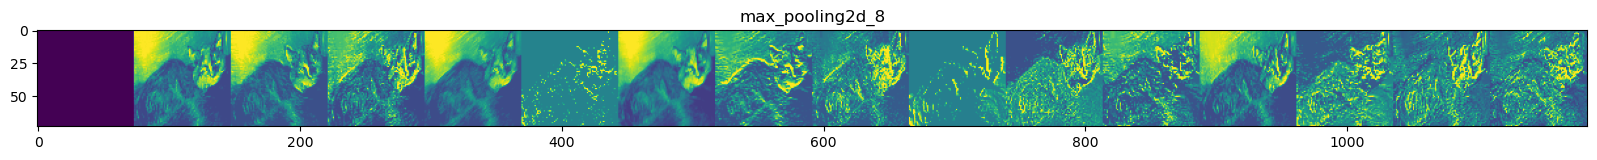

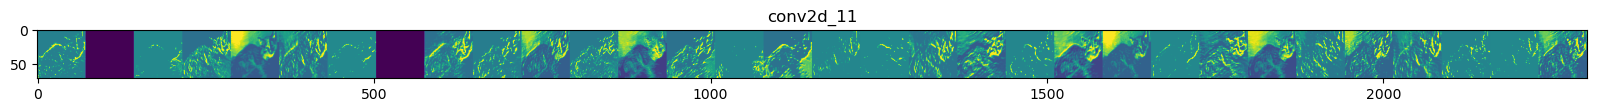

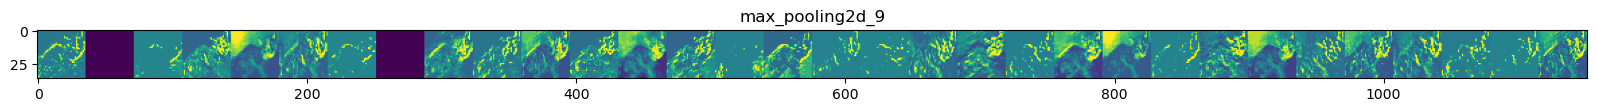

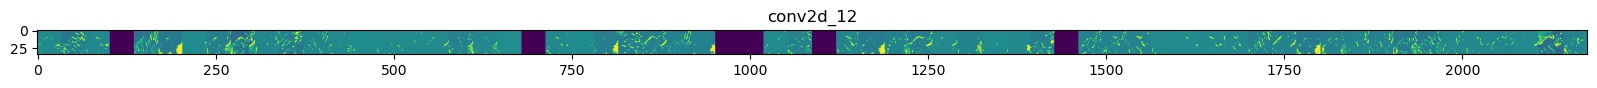

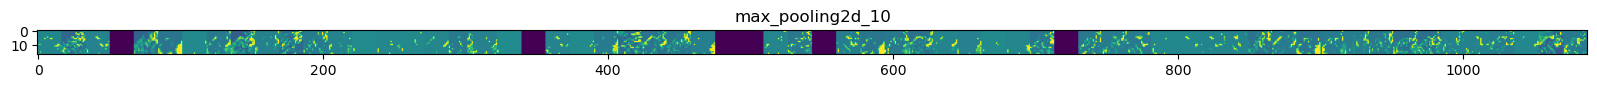

In [41]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(input_layer, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

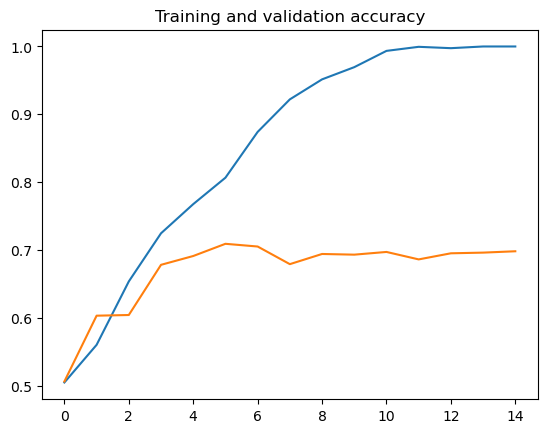

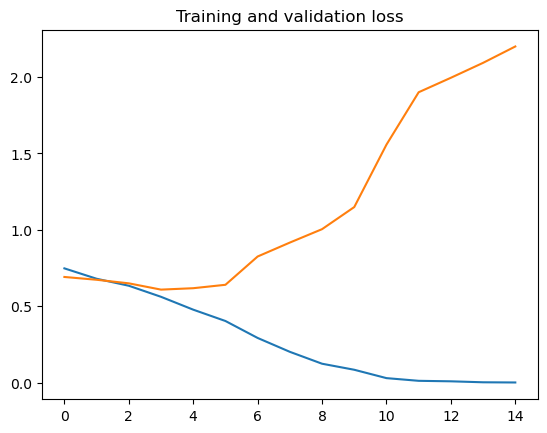

In [42]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

We can see the data is very overfitted -- note how validation loss starts increasing rapidly after 6 or so epochs

### Adding Data Augmentation

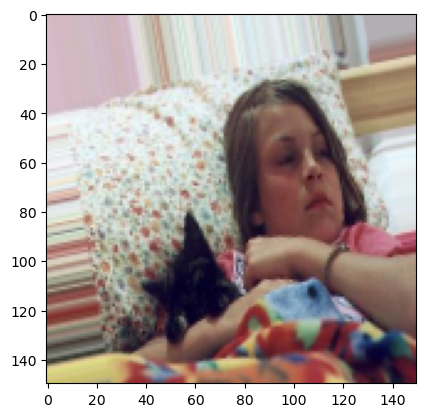

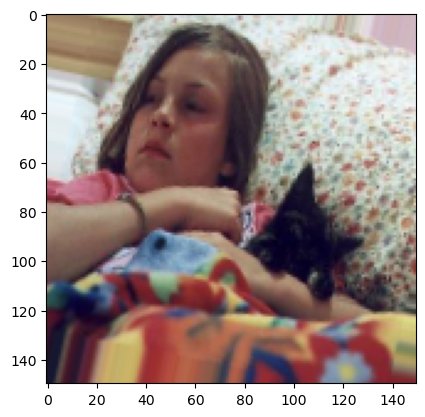

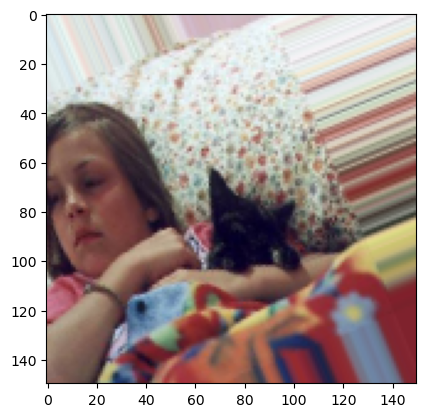

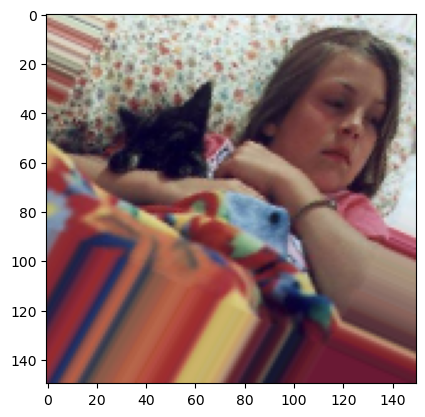

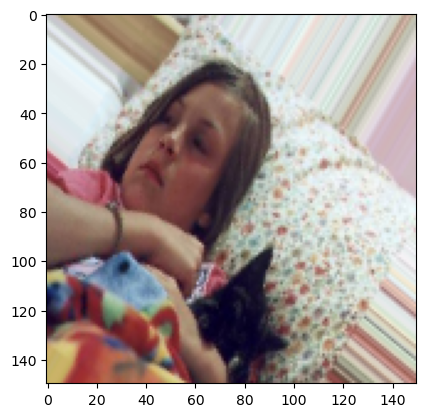

In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

img_path = os.path.join(train_cats_dir, train_cat_fnames[2])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [45]:
train_datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Flow training images in batches of 32 using train_datagen generator
train_datagenerator2 = train_datagen2.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [46]:
# fit again using new train_generator
history = model.fit(
      train_datagenerator2,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
100/100 - 10s - loss: 0.7620 - acc: 0.6080 - val_loss: 0.6180 - val_acc: 0.6670 - 10s/epoch - 95ms/step
Epoch 2/15
100/100 - 9s - loss: 0.6260 - acc: 0.6545 - val_loss: 0.6081 - val_acc: 0.6540 - 9s/epoch - 90ms/step
Epoch 3/15
100/100 - 9s - loss: 0.6085 - acc: 0.6665 - val_loss: 0.5713 - val_acc: 0.6890 - 9s/epoch - 88ms/step
Epoch 4/15
100/100 - 9s - loss: 0.5889 - acc: 0.6900 - val_loss: 0.5765 - val_acc: 0.7030 - 9s/epoch - 89ms/step
Epoch 5/15
100/100 - 9s - loss: 0.5920 - acc: 0.6820 - val_loss: 0.5720 - val_acc: 0.6890 - 9s/epoch - 90ms/step
Epoch 6/15
100/100 - 9s - loss: 0.5856 - acc: 0.6815 - val_loss: 0.5713 - val_acc: 0.7040 - 9s/epoch - 88ms/step
Epoch 7/15
100/100 - 9s - loss: 0.5702 - acc: 0.7000 - val_loss: 0.5348 - val_acc: 0.7300 - 9s/epoch - 88ms/step
Epoch 8/15
100/100 - 9s - loss: 0.5739 - acc: 0.6895 - val_loss: 0.5305 - val_acc: 0.7560 - 9s/epoch - 90ms/step
Epoch 9/15
100/100 - 9s - loss: 0.5560 - acc: 0.7110 - val_loss: 0.5361 - val_acc: 0.7460 - 9s

Text(0.5, 1.0, 'Training and validation loss')

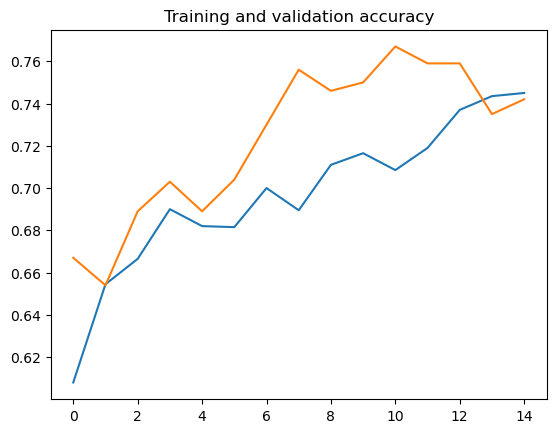

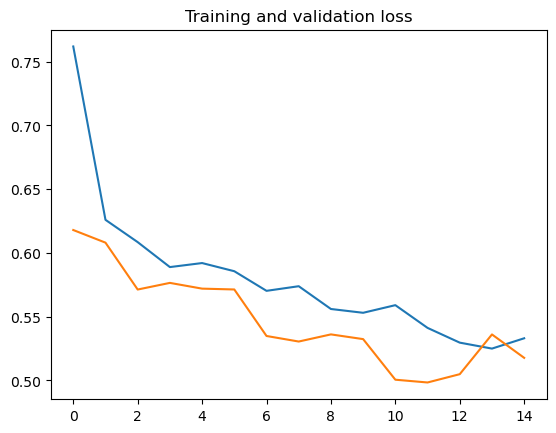

In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [51]:
### Adding Dropout Regularisation, right before final layer

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              # switching to legacy Adam here due to M1 Mac & RMS & tf 2.11 issue
              optimizer=Adam(),
              metrics=['acc'])

In [52]:
history = model.fit(
      train_datagenerator2,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/30
100/100 - 10s - loss: 0.7377 - acc: 0.5245 - val_loss: 0.6650 - val_acc: 0.5760 - 10s/epoch - 100ms/step
Epoch 2/30
100/100 - 9s - loss: 0.6752 - acc: 0.5595 - val_loss: 0.6900 - val_acc: 0.5140 - 9s/epoch - 91ms/step
Epoch 3/30
100/100 - 9s - loss: 0.6940 - acc: 0.5120 - val_loss: 0.6917 - val_acc: 0.5170 - 9s/epoch - 90ms/step
Epoch 4/30
100/100 - 9s - loss: 0.6914 - acc: 0.5360 - val_loss: 0.6857 - val_acc: 0.5770 - 9s/epoch - 93ms/step
Epoch 5/30
100/100 - 10s - loss: 0.6819 - acc: 0.5570 - val_loss: 0.6589 - val_acc: 0.5920 - 10s/epoch - 97ms/step
Epoch 6/30
100/100 - 10s - loss: 0.6796 - acc: 0.5695 - val_loss: 0.6770 - val_acc: 0.6070 - 10s/epoch - 96ms/step
Epoch 7/30
100/100 - 9s - loss: 0.6723 - acc: 0.5980 - val_loss: 0.6521 - val_acc: 0.5520 - 9s/epoch - 91ms/step
Epoch 8/30
100/100 - 9s - loss: 0.6381 - acc: 0.6240 - val_loss: 0.6273 - val_acc: 0.6620 - 9s/epoch - 89ms/step
Epoch 9/30
100/100 - 9s - loss: 0.6554 - acc: 0.6175 - val_loss: 0.6468 - val_acc: 0.6730

Text(0.5, 1.0, 'Training and validation loss')

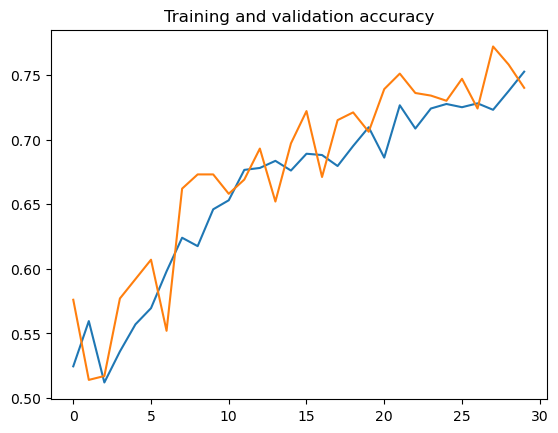

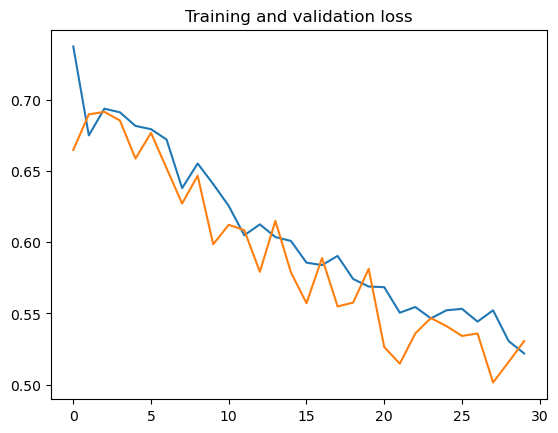

In [53]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [54]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-25 23:37:31--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.212.240, 142.250.179.240, 142.250.200.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.212.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  15.5MB/s    in 5.7s    

2023-06-25 23:37:37 (14.6 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [55]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    # include_top basically leaves off the dense layers
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [57]:
for layer in pre_trained_model.layers:
  layer.trainable = False
  print(layer)

In [58]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [60]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 74, 74, 32)   864         ['input_12[0][0]']               
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_19[0][0]']              
 alization)                                                                                       
                                                                                       

In [61]:
# from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
            #   again, using Adam due to the tf 2.11 issue
            #   optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

In [62]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 74, 74, 32)   864         ['input_12[0][0]']               
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_19[0][0]']              
 alization)                                                                                       
                                                                                            

In [63]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/2


<ipython-input-63-223274cfaaff>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 - 17s - loss: 0.5811 - acc: 0.9090 - val_loss: 0.2494 - val_acc: 0.9160 - 17s/epoch - 168ms/step
Epoch 2/2
100/100 - 12s - loss: 0.0334 - acc: 0.9865 - val_loss: 0.1301 - val_acc: 0.9560 - 12s/epoch - 120ms/step


Text(0.5, 1.0, 'Training and validation loss')

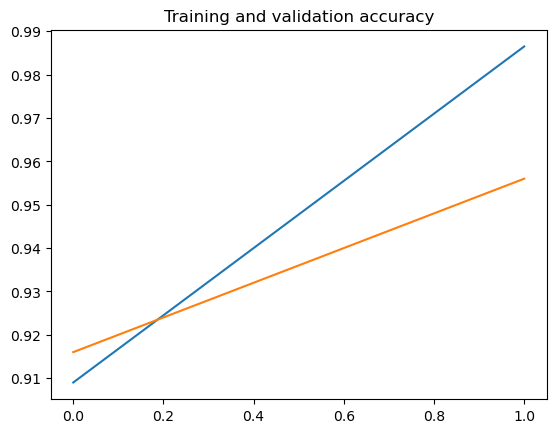

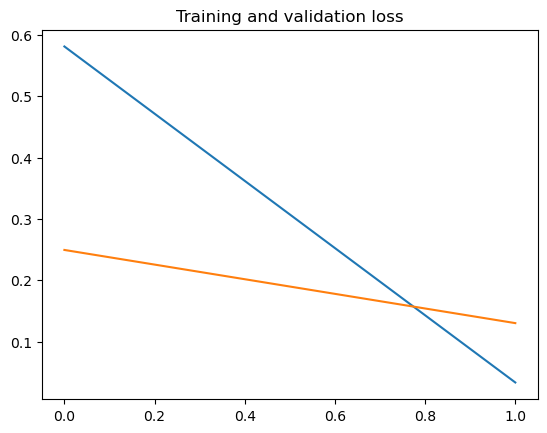

In [64]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

Here, we are just adding two dense layers (and 1 dropout) onto the pretrained network. The weights of the pretrained layers were not changed.

If we want further performance, we can try fine tuning. For fine tuning, we set the top layers of the pre-trained model to trainable. 
This should be done only after the new top layers were trained.

In [68]:
from tensorflow.keras.optimizers import SGD

unfreeze = False

# Unfreeze all models after "mixed6"
for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

# As an optimizer, here we will use SGD 
# with a very low learning rate (0.00001)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])

In [69]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/50


<ipython-input-69-cc858d536531>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 - 19s - loss: 0.1889 - acc: 0.9365 - val_loss: 8.2329 - val_acc: 0.7280 - 19s/epoch - 187ms/step
Epoch 2/50
100/100 - 13s - loss: 0.0674 - acc: 0.9770 - val_loss: 0.1527 - val_acc: 0.9650 - 13s/epoch - 134ms/step
Epoch 3/50
100/100 - 13s - loss: 0.0454 - acc: 0.9855 - val_loss: 0.1735 - val_acc: 0.9580 - 13s/epoch - 133ms/step
Epoch 4/50
100/100 - 14s - loss: 0.0081 - acc: 0.9980 - val_loss: 0.2404 - val_acc: 0.9600 - 14s/epoch - 140ms/step
Epoch 5/50
100/100 - 15s - loss: 0.0183 - acc: 0.9930 - val_loss: 0.2960 - val_acc: 0.9450 - 15s/epoch - 147ms/step
Epoch 6/50
100/100 - 14s - loss: 0.0475 - acc: 0.9900 - val_loss: 0.5063 - val_acc: 0.9220 - 14s/epoch - 139ms/step
Epoch 7/50
100/100 - 13s - loss: 0.0231 - acc: 0.9920 - val_loss: 0.3699 - val_acc: 0.9390 - 13s/epoch - 131ms/step
Epoch 8/50
100/100 - 13s - loss: 0.0081 - acc: 0.9965 - val_loss: 0.4634 - val_acc: 0.9170 - 13s/epoch - 130ms/step
Epoch 9/50
100/100 - 12s - loss: 0.0221 - acc: 0.9940 - val_loss: 0.2929 - val_acc: